In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import accuracy_score


In [2]:
diabetes_dataset=pd.read_csv('diabetes.csv')
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Object columns : Index([], dtype='object')

Numberical columns : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


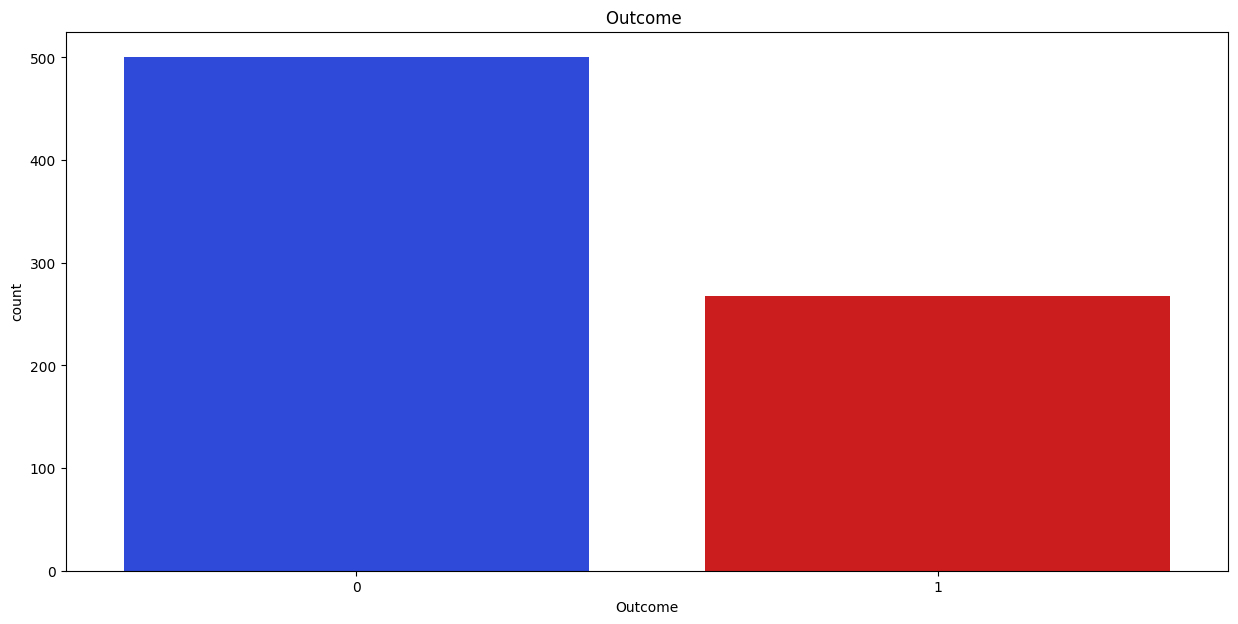

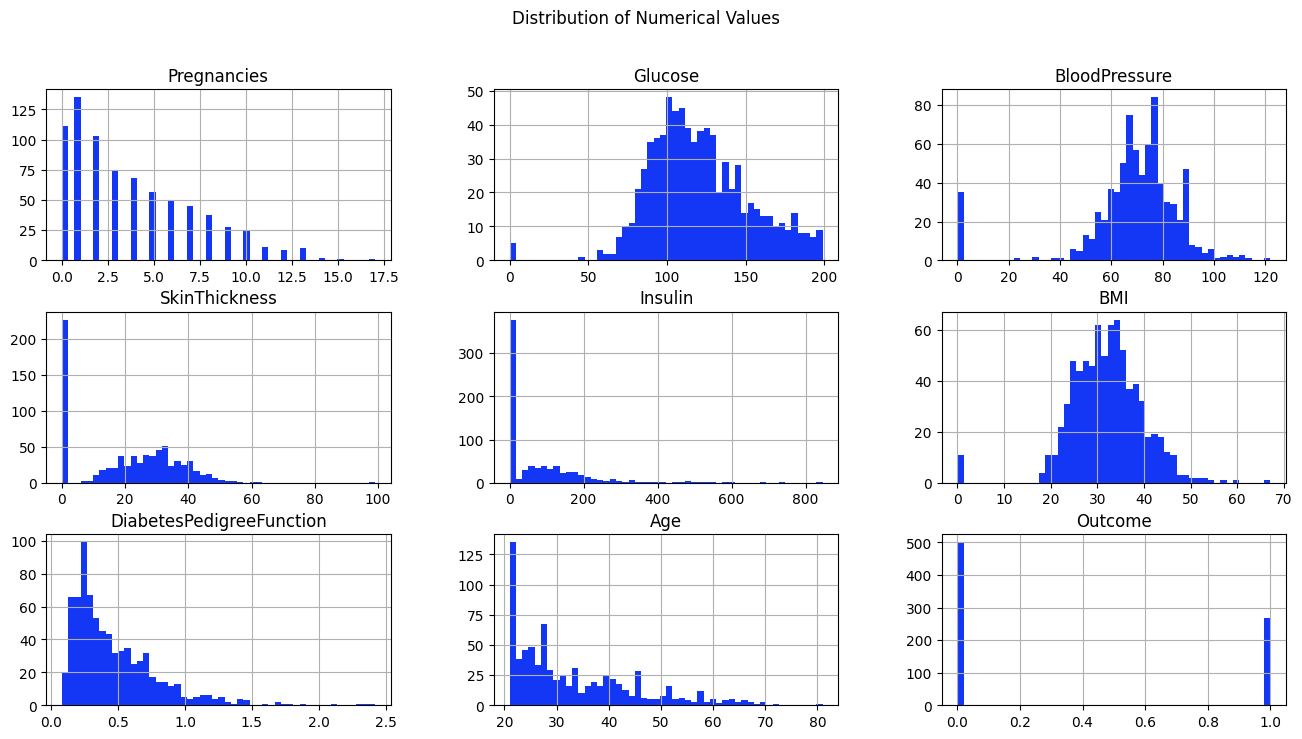

<Figure size 2000x4000 with 0 Axes>

In [3]:
colors2 = sns.color_palette(['#1337f5', '#E80000'], 2)
colors1 = sns.color_palette(['#1337f5'], 1)
plt.figure(figsize=(15,7))
plt.title('Outcome ') 
sns.countplot(data=diabetes_dataset, x='Outcome', palette=colors2, order=diabetes_dataset['Outcome'].value_counts().index)
diabetes_dataset.hist(figsize=(16, 8), bins=50, color=colors1) 
plt.suptitle("Distribution of Numerical Values") 


obj_cols = diabetes_dataset.select_dtypes(include='object').columns[1:]
num_cols = diabetes_dataset.select_dtypes(exclude='object').columns
print(f'Object columns : {obj_cols}', end='\n\n')
print(f'Numberical columns : {num_cols}')
plt.figure(figsize=(20, 40))
for i in range(len(obj_cols)):
  plt.subplot(7, 2, i+1)

  if(diabetes_dataset[obj_cols[i]].nunique() < 3):
    ax = sns.countplot(data=diabetes_dataset, x=obj_cols[i], palette=colors2, order=diabetes_dataset[obj_cols[i]].value_counts().index[:6])
  else:
    ax = sns.countplot(data=diabetes_dataset, x=obj_cols[i], palette=colors2, order=diabetes_dataset[obj_cols[i]].value_counts().index[:6])

  
  plt.title(f'{obj_cols[i]}', fontsize=15, fontweight='bold', color='brown')
  plt.subplots_adjust(hspace=0.5)

  for p in ax.patches:
    height = p.get_height() 
    width = p.get_width()
    percent = height/len(diabetes_dataset)

    ax.text(x=p.get_x()+width/2, y=height+2, s=format(percent, ".2%"), fontsize=12, ha='center', weight='bold')


In [4]:
numerical = diabetes_dataset.select_dtypes(exclude='object')
for col in numerical:
  Q1, Q3 = diabetes_dataset[col].quantile([0.25,0.75])
  IQR = Q3 - Q1
  right = Q3 + 1.5 * IQR
  left = Q1 - 1.5 * IQR
  diabetes_dataset[col] = np.where(diabetes_dataset[col]>IQR, Q3, diabetes_dataset[col])
  n = len(diabetes_dataset.loc[(diabetes_dataset[col] < left) | (diabetes_dataset[col] > right)])
  print(f"{col}:\n\tOutlier Num = {n}\n\tOutlier Percentage = {n*100/len(diabetes_dataset):.2f}%\n")

Pregnancies:
	Outlier Num = 0
	Outlier Percentage = 0.00%

Glucose:
	Outlier Num = 5
	Outlier Percentage = 0.65%

BloodPressure:
	Outlier Num = 35
	Outlier Percentage = 4.56%

SkinThickness:
	Outlier Num = 0
	Outlier Percentage = 0.00%

Insulin:
	Outlier Num = 0
	Outlier Percentage = 0.00%

BMI:
	Outlier Num = 11
	Outlier Percentage = 1.43%

DiabetesPedigreeFunction:
	Outlier Num = 0
	Outlier Percentage = 0.00%

Age:
	Outlier Num = 0
	Outlier Percentage = 0.00%

Outcome:
	Outlier Num = 0
	Outlier Percentage = 0.00%



In [5]:
# number of row and column
diabetes_dataset.shape

(768, 9)

In [6]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0,768.000000
mean,3.173177,139.336914,76.354167,18.510417,52.386719,36.075781,0.428467,41.0,0.348958
std,2.250878,11.286826,16.695434,13.234418,55.953535,4.351581,0.200407,0.0,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,41.0,0.000000
25%,1.000000,140.250000,80.000000,0.000000,0.000000,36.600000,0.243750,41.0,0.000000
50%,3.000000,140.250000,80.000000,23.000000,30.500000,36.600000,0.372500,41.0,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.062500,36.600000,0.626250,41.0,1.000000
max,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.0,1.000000


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

def try_model(model_pipeline, X_train, y_train, X_test, y_test):
    
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    print(model_pipeline.score(X_test, y_test))

    print(f"precision {precision_score(y_test, y_pred)}")
    print(f"recall {recall_score(y_test, y_pred)}")
    print(f"f1_score {f1_score(y_test, y_pred)}")
   
    #print(f'Training Accuracy : {model_pipeline.score(X_train, y_train)}')
    #print(f'Test Accuracy : {model_pipeline.score(X_test, y_test)}')
    #confusion_matrix(X_train, y_train)

    return y_pred, classification_report(y_test, y_pred)

In [8]:
diabetes_dataset['Outcome'].value_counts() #zero and one lable  
# o is non diabetes
# 1 is diabetes

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [9]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0.0,2.852000,139.408500,76.960000,18.078000,49.665500,35.941200,0.408649,41.0
1.0,3.772388,139.203358,75.223881,19.317164,57.463619,36.326866,0.465440,41.0


In [10]:
# sprerating the data and label
X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']

In [11]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0   140.25           80.0           32.0     0.00  36.6   
1            1.0   140.25           80.0           29.0     0.00  36.6   
2            6.0   140.25           80.0            0.0     0.00  36.6   
3            1.0   140.25           80.0           23.0    94.00  36.6   
4            0.0   140.25           80.0           32.0   127.25  36.6   
..           ...      ...            ...            ...      ...   ...   
763          6.0   140.25           80.0           32.0   127.25  36.6   
764          2.0   140.25           80.0           27.0     0.00  36.6   
765          5.0   140.25           80.0           23.0   112.00  36.6   
766          1.0   140.25           80.0            0.0     0.00  36.6   
767          1.0   140.25           80.0           31.0     0.00  36.6   

     DiabetesPedigreeFunction   Age  
0                     0.62625  41.0  
1                     0.35100  41.0

In [12]:
print(Y)

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64


In [13]:
diabetes_dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']] = StandardScaler().fit_transform(diabetes_dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']])

In [14]:
X=diabetes_dataset.drop(columns='Outcome',axis=1)

print(X)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       1.256694  0.080951       0.218515       1.019945 -0.936864  0.120545   
1      -0.966109  0.080951       0.218515       0.793115 -0.936864  0.120545   
2       1.256694  0.080951       0.218515      -1.399569 -0.936864  0.120545   
3      -0.966109  0.080951       0.218515       0.339456  0.744196  0.120545   
4      -1.410670  0.080951       0.218515       1.019945  1.338826  0.120545   
..           ...       ...            ...            ...       ...       ...   
763     1.256694  0.080951       0.218515       1.019945  1.338826  0.120545   
764    -0.521548  0.080951       0.218515       0.641896 -0.936864  0.120545   
765     0.812134  0.080951       0.218515       0.339456  1.066101  0.120545   
766    -0.966109  0.080951       0.218515      -1.399569 -0.936864  0.120545   
767    -0.966109  0.080951       0.218515       0.944335 -0.936864  0.120545   

     DiabetesPedigreeFunction  Age  
0 

In [15]:
X=standaraized_data
Y=diabetes_dataset['Outcome']
print(X)
print(Y)

NameError: name 'standaraized_data' is not defined

: 

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [18]:
def recall_(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn)

In [19]:
def precision(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fp = sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp)

{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
0.6558441558441559
precision 0.5102040816326531
recall 0.46296296296296297
f1_score 0.48543689320388356
              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74       100
         1.0       0.51      0.46      0.49        54

    accuracy                           0.66       154
   macro avg       0.62      0.61      0.61       154
weighted avg       0.65      0.66      0.65       154



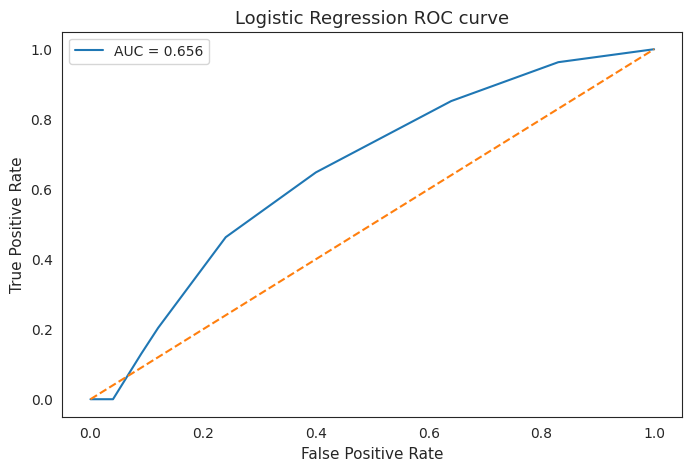

0.46296296296296297
0.5102040816326531
0.46296296296296297
0.5102040816326531


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

# Use the best combination of hyperparameters to make predictions on the test data
y_pred, report = try_model(grid_search,
                           X_train,
                          Y_train ,
                           X_test,
                           Y_test)
y_predict_prob = grid_search.predict_proba(X_test)[:, 1]

print(report)
fpr, tpr, thresholds = roc_curve(Y_test, y_predict_prob)
auc = roc_auc_score(Y_test, y_predict_prob)
sns.set_style("white")
plt.figure(figsize = [8, 5])
plt.plot(fpr, tpr, label = (f"AUC = {auc:.3f}"))
plt.plot((0,1), ls = "--")
plt.title("Logistic Regression ROC curve", size = 13)
plt.xlabel("False Positive Rate", size = 11)
plt.ylabel("True Positive Rate", size = 11)
plt.legend(loc = 'best')
plt.show()
plt.show()
print(recall_(Y_test, y_pred))
print(precision(Y_test, y_pred))
print(recall_(Y_test, y_pred))
print(precision(Y_test, y_pred))


0.6558441558441559
precision 0.5142857142857142
recall 0.3333333333333333
f1_score 0.4044943820224719
              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76       100
         1.0       0.51      0.33      0.40        54

    accuracy                           0.66       154
   macro avg       0.61      0.58      0.58       154
weighted avg       0.63      0.66      0.63       154



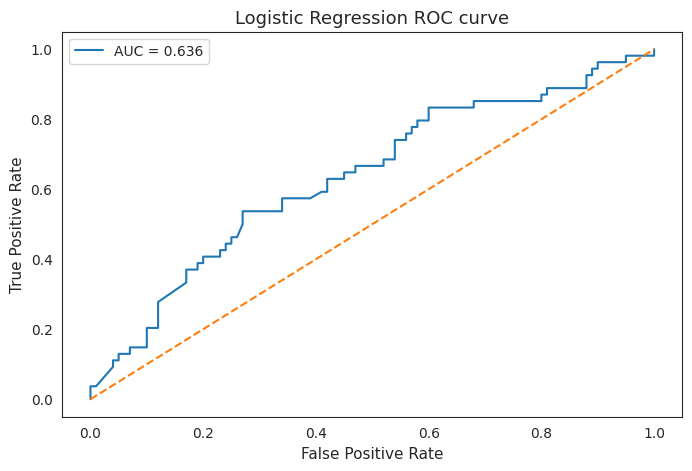

0.3333333333333333
0.5142857142857142


In [20]:
lr = LogisticRegression(C = 1000)
y_pred, report = try_model(lr,
                           X_train,
                          Y_train ,
                           X_test,
                           Y_test)
y_predict_prob = lr.predict_proba(X_test)[:, 1]


print(report)
fpr, tpr, thresholds = roc_curve(Y_test, y_predict_prob)
auc = roc_auc_score(Y_test, y_predict_prob)
sns.set_style("white")
plt.figure(figsize = [8, 5])
plt.plot(fpr, tpr, label = (f"AUC = {auc:.3f}"))
plt.plot((0,1), ls = "--")
plt.title("Logistic Regression ROC curve", size = 13)
plt.xlabel("False Positive Rate", size = 11)
plt.ylabel("True Positive Rate", size = 11)
plt.legend(loc = 'best')
plt.show()
plt.show()
print(recall_(Y_test, y_pred))
print(precision(Y_test, y_pred))

0.6168831168831169
precision 0.4444444444444444
recall 0.37037037037037035
f1_score 0.404040404040404
              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72       100
         1.0       0.44      0.37      0.40        54

    accuracy                           0.62       154
   macro avg       0.57      0.56      0.56       154
weighted avg       0.60      0.62      0.61       154



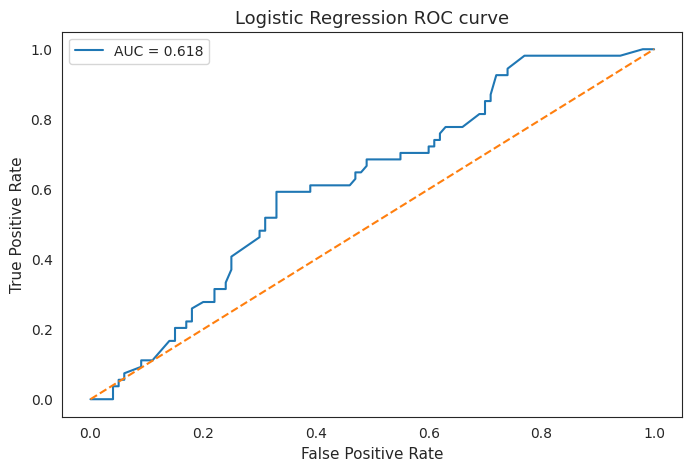

0.37037037037037035
0.4444444444444444


In [23]:
lr = RandomForestClassifier()
y_pred, report = try_model(lr,
                           X_train,
                          Y_train ,
                           X_test,
                           Y_test)
y_predict_prob = lr.predict_proba(X_test)[:, 1]


print(report)
fpr, tpr, thresholds = roc_curve(Y_test, y_predict_prob)
auc = roc_auc_score(Y_test, y_predict_prob)
sns.set_style("white")
plt.figure(figsize = [8, 5])
plt.plot(fpr, tpr, label = (f"AUC = {auc:.3f}"))
plt.plot((0,1), ls = "--")
plt.title("Logistic Regression ROC curve", size = 13)
plt.xlabel("False Positive Rate", size = 11)
plt.ylabel("True Positive Rate", size = 11)
plt.legend(loc = 'best')
plt.show()
plt.show()
print(recall_(Y_test, y_pred))
print(precision(Y_test, y_pred))

In [ ]:
lr = LogisticRegression(C = 1000)
y_pred, report = try_model(lr,
                           X_train,
                          Y_train ,
                           X_test,
                           Y_test)
y_predict_prob = lr.predict_proba(X_test)[:, 1]


print(report)
fpr, tpr, thresholds = roc_curve(Y_test, y_predict_prob)
auc = roc_auc_score(Y_test, y_predict_prob)
sns.set_style("white")
plt.figure(figsize = [8, 5])
plt.plot(fpr, tpr, label = (f"AUC = {auc:.3f}"))
plt.plot((0,1), ls = "--")
plt.title("Logistic Regression ROC curve", size = 13)
plt.xlabel("False Positive Rate", size = 11)
plt.ylabel("True Positive Rate", size = 11)
plt.legend(loc = 'best')
plt.show()
plt.show()
print(recall_(Y_test, y_pred))
print(precision(Y_test, y_pred))

In [25]:
from sklearn.model_selection import GridSearchCV
# Define the model
model = RandomForestClassifier()

param_grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

score = grid_search.score(X_test, Y_test)
print(f'Test score: {score:.2f}')

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Test score: 0.67


0.6363636363636364
precision 0.4782608695652174
recall 0.4074074074074074
f1_score 0.44000000000000006
              precision    recall  f1-score   support

         0.0       0.70      0.76      0.73       100
         1.0       0.48      0.41      0.44        54

    accuracy                           0.64       154
   macro avg       0.59      0.58      0.59       154
weighted avg       0.62      0.64      0.63       154



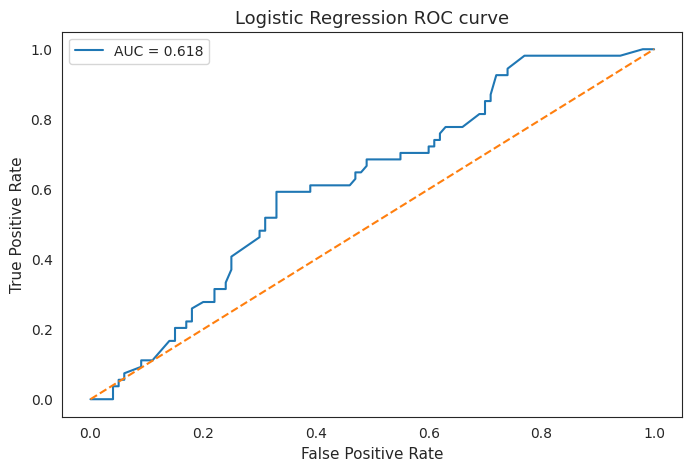

0.4074074074074074
0.4782608695652174


In [26]:
y_pred, report = try_model(model,
                           X_train,
                          Y_train ,
                           X_test,
                           Y_test)
y_predict_prob = lr.predict_proba(X_test)[:, 1]


print(report)
fpr, tpr, thresholds = roc_curve(Y_test, y_predict_prob)
auc = roc_auc_score(Y_test, y_predict_prob)
sns.set_style("white")
plt.figure(figsize = [8, 5])
plt.plot(fpr, tpr, label = (f"AUC = {auc:.3f}"))
plt.plot((0,1), ls = "--")
plt.title("Logistic Regression ROC curve", size = 13)
plt.xlabel("False Positive Rate", size = 11)
plt.ylabel("True Positive Rate", size = 11)
plt.legend(loc = 'best')
plt.show()
plt.show()
print(recall_(Y_test, y_pred))
print(precision(Y_test, y_pred))

In [ ]:

# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print(recall_())

/home/ammat/ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ammat/ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best: 0.961333 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.957000 (0.016563) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.953333 (0.016799) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.954667 (0.016680) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.958333 (0.016550) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.955333 (0.016275) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.954667 (0.016680) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.958000 (0.017588) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.958667 (0.015861) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.955667 (0.017452) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.958333 (0.017528) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.958333 (0.017528) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.956000 (0.018184) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.961333 (0.016879) wi

TypeError: recall_() missing 2 required positional arguments: 'y_true' and 'y_pred'

(1000, 100) (614, 8) (154, 8)
0.6688311688311688
precision 0.5555555555555556
recall 0.2777777777777778
f1_score 0.3703703703703704
              precision    recall  f1-score   support

         0.0       0.69      0.88      0.78       100
         1.0       0.56      0.28      0.37        54

    accuracy                           0.67       154
   macro avg       0.62      0.58      0.57       154
weighted avg       0.64      0.67      0.63       154



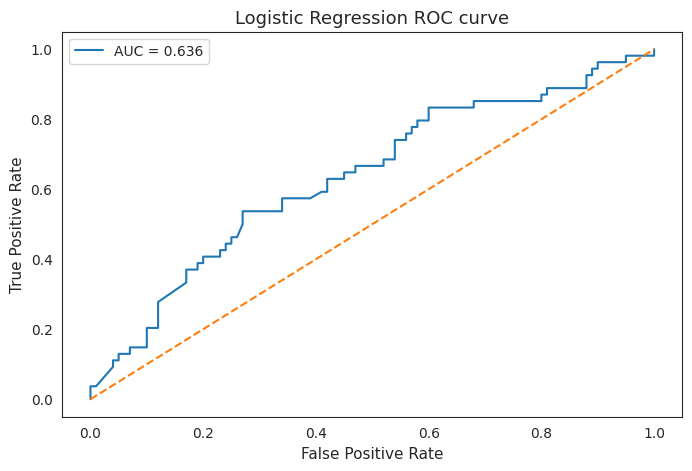

0.2777777777777778
0.5555555555555556
0.2777777777777778
0.5555555555555556


: 

In [ ]:
print(X.shape,X_train.shape,X_test.shape,)
y_pred, report = try_model(grid_search,
                           X_train,
                          Y_train ,
                           X_test,
                           Y_test)
y_predict_prob = lr.predict_proba(X_test)[:, 1]


print(report)
fpr, tpr, thresholds = roc_curve(Y_test, y_predict_prob)
auc = roc_auc_score(Y_test, y_predict_prob)
sns.set_style("white")
plt.figure(figsize = [8, 5])
plt.plot(fpr, tpr, label = (f"AUC = {auc:.3f}"))
plt.plot((0,1), ls = "--")
plt.title("Logistic Regression ROC curve", size = 13)
plt.xlabel("False Positive Rate", size = 11)
plt.ylabel("True Positive Rate", size = 11)
plt.legend(loc = 'best')
plt.show()
plt.show()
print(recall_(Y_test, y_pred))
print(precision(Y_test, y_pred))
print(recall_(Y_test, y_pred))
print(precision(Y_test, y_pred))

0.6558441558441559
precision 1.0
recall 0.018518518518518517
f1_score 0.03636363636363636
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79       100
         1.0       1.00      0.02      0.04        54

    accuracy                           0.66       154
   macro avg       0.83      0.51      0.41       154
weighted avg       0.78      0.66      0.53       154



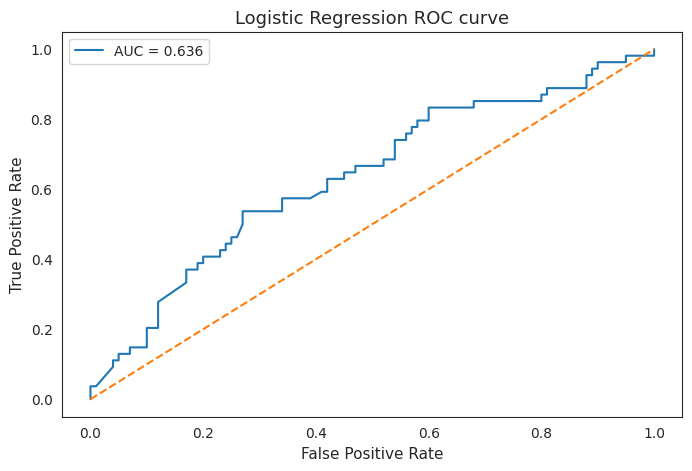

0.018518518518518517
1.0
0.018518518518518517
1.0
0.6558441558441559
precision 0.5142857142857142
recall 0.3333333333333333
f1_score 0.4044943820224719
              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76       100
         1.0       0.51      0.33      0.40        54

    accuracy                           0.66       154
   macro avg       0.61      0.58      0.58       154
weighted avg       0.63      0.66      0.63       154



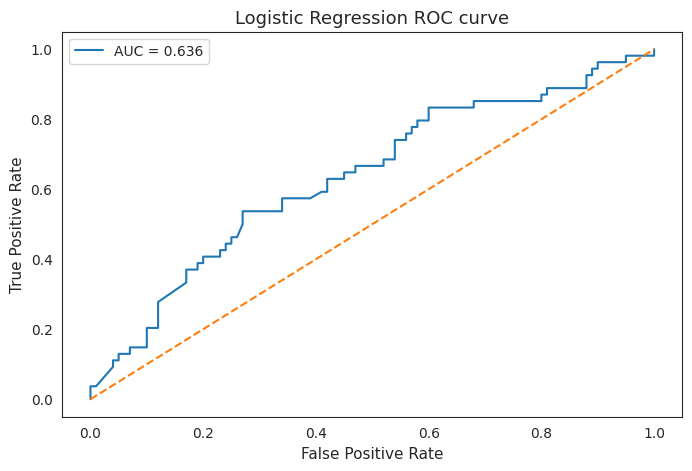

0.3333333333333333
0.5142857142857142
0.3333333333333333
0.5142857142857142
0.6558441558441559
precision 1.0
recall 0.018518518518518517
f1_score 0.03636363636363636
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79       100
         1.0       1.00      0.02      0.04        54

    accuracy                           0.66       154
   macro avg       0.83      0.51      0.41       154
weighted avg       0.78      0.66      0.53       154



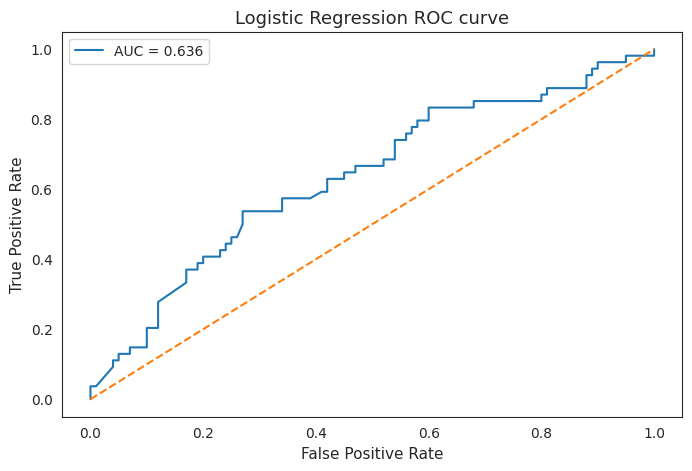

0.018518518518518517
1.0
0.018518518518518517
1.0
0.6558441558441559
precision 0.5142857142857142
recall 0.3333333333333333
f1_score 0.4044943820224719
              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76       100
         1.0       0.51      0.33      0.40        54

    accuracy                           0.66       154
   macro avg       0.61      0.58      0.58       154
weighted avg       0.63      0.66      0.63       154



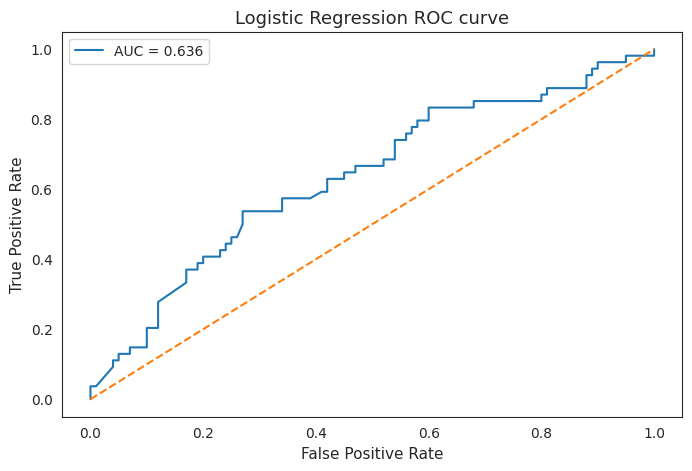

0.3333333333333333
0.5142857142857142
0.3333333333333333
0.5142857142857142
0.6558441558441559
precision 0.5142857142857142
recall 0.3333333333333333
f1_score 0.4044943820224719
              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76       100
         1.0       0.51      0.33      0.40        54

    accuracy                           0.66       154
   macro avg       0.61      0.58      0.58       154
weighted avg       0.63      0.66      0.63       154



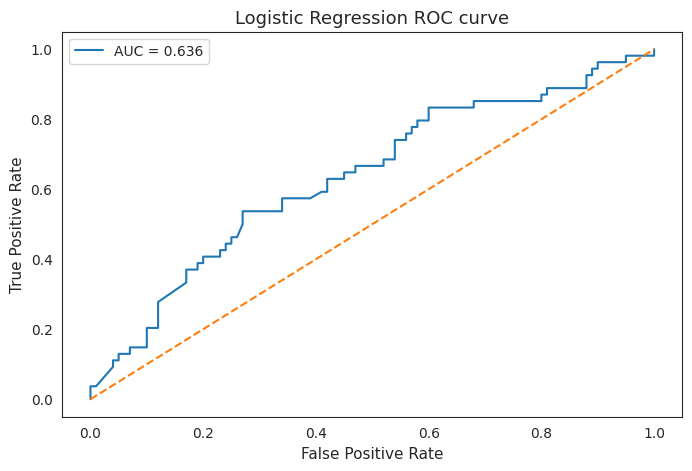

0.3333333333333333
0.5142857142857142
0.3333333333333333
0.5142857142857142
0.6688311688311688
precision 0.5555555555555556
recall 0.2777777777777778
f1_score 0.3703703703703704
              precision    recall  f1-score   support

         0.0       0.69      0.88      0.78       100
         1.0       0.56      0.28      0.37        54

    accuracy                           0.67       154
   macro avg       0.62      0.58      0.57       154
weighted avg       0.64      0.67      0.63       154



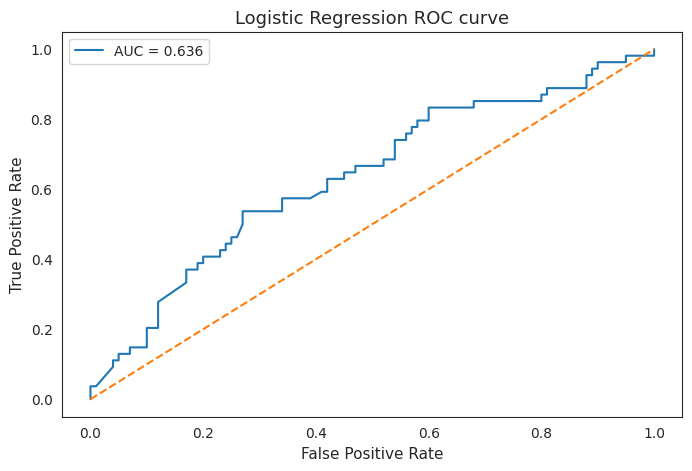

0.2777777777777778
0.5555555555555556
0.2777777777777778
0.5555555555555556
0.6558441558441559
precision 0.5142857142857142
recall 0.3333333333333333
f1_score 0.4044943820224719
              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76       100
         1.0       0.51      0.33      0.40        54

    accuracy                           0.66       154
   macro avg       0.61      0.58      0.58       154
weighted avg       0.63      0.66      0.63       154



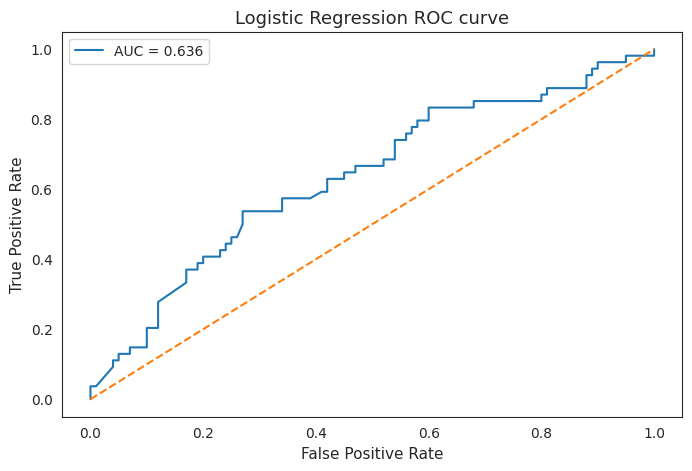

0.3333333333333333
0.5142857142857142
0.3333333333333333
0.5142857142857142
0.6688311688311688
precision 0.5555555555555556
recall 0.2777777777777778
f1_score 0.3703703703703704
              precision    recall  f1-score   support

         0.0       0.69      0.88      0.78       100
         1.0       0.56      0.28      0.37        54

    accuracy                           0.67       154
   macro avg       0.62      0.58      0.57       154
weighted avg       0.64      0.67      0.63       154



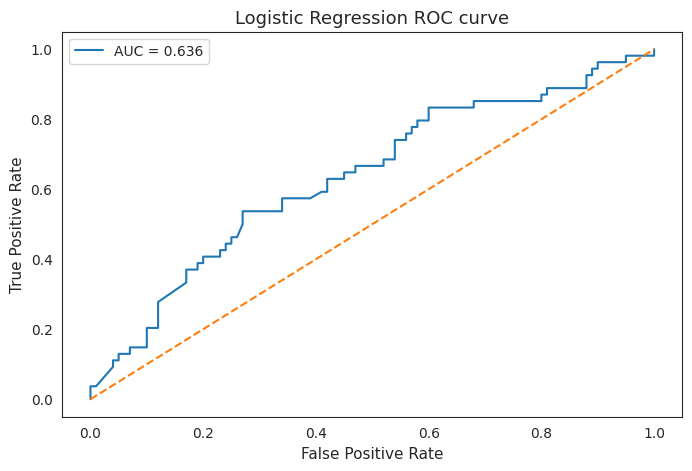

0.2777777777777778
0.5555555555555556
0.2777777777777778
0.5555555555555556
0.6558441558441559
precision 0.5142857142857142
recall 0.3333333333333333
f1_score 0.4044943820224719
              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76       100
         1.0       0.51      0.33      0.40        54

    accuracy                           0.66       154
   macro avg       0.61      0.58      0.58       154
weighted avg       0.63      0.66      0.63       154



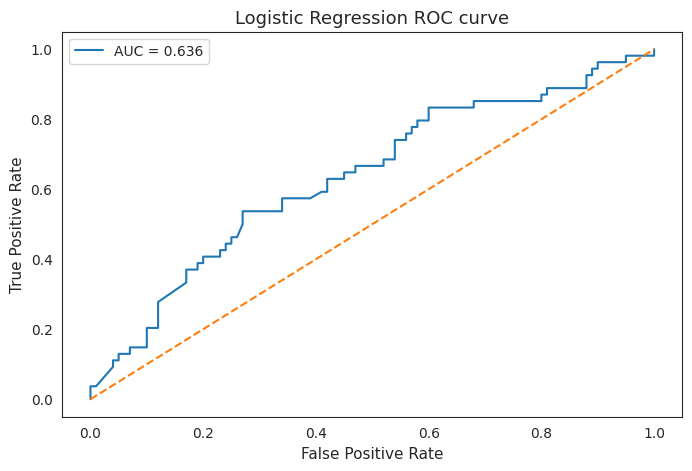

0.3333333333333333
0.5142857142857142
0.3333333333333333
0.5142857142857142
0.6558441558441559
precision 0.5142857142857142
recall 0.3333333333333333
f1_score 0.4044943820224719
              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76       100
         1.0       0.51      0.33      0.40        54

    accuracy                           0.66       154
   macro avg       0.61      0.58      0.58       154
weighted avg       0.63      0.66      0.63       154



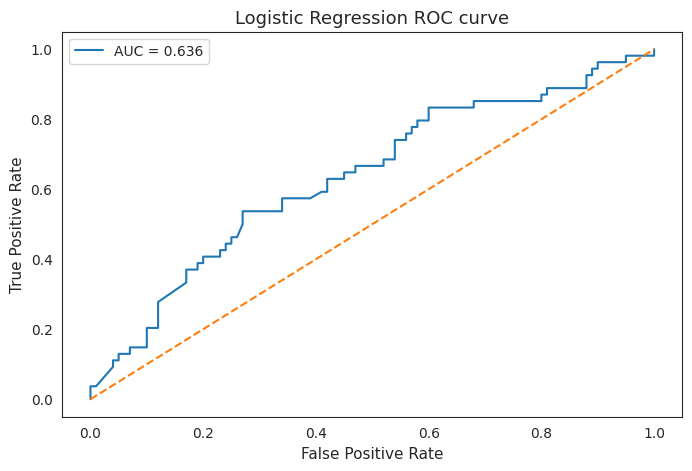

0.3333333333333333
0.5142857142857142
0.3333333333333333
0.5142857142857142
0.6558441558441559
precision 0.5142857142857142
recall 0.3333333333333333
f1_score 0.4044943820224719
              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76       100
         1.0       0.51      0.33      0.40        54

    accuracy                           0.66       154
   macro avg       0.61      0.58      0.58       154
weighted avg       0.63      0.66      0.63       154



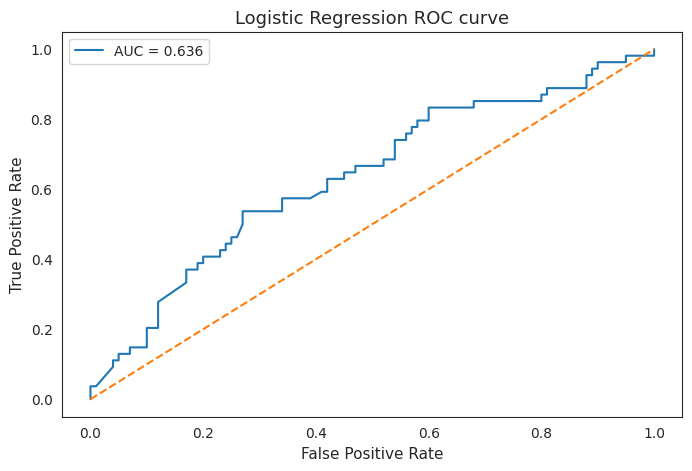

0.3333333333333333
0.5142857142857142
0.3333333333333333
0.5142857142857142
0.6558441558441559
precision 0.5142857142857142
recall 0.3333333333333333
f1_score 0.4044943820224719
              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76       100
         1.0       0.51      0.33      0.40        54

    accuracy                           0.66       154
   macro avg       0.61      0.58      0.58       154
weighted avg       0.63      0.66      0.63       154



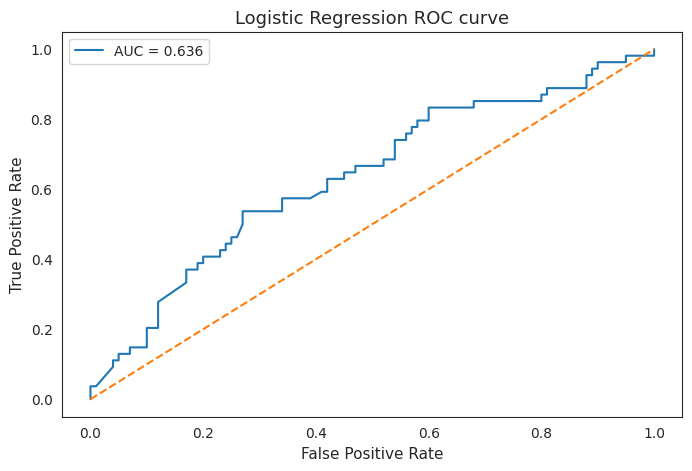

0.3333333333333333
0.5142857142857142
0.3333333333333333
0.5142857142857142


In [ ]:
clf = [ 
LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000, C=0.01), LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000, C=1000), 
LogisticRegression(solver='sag',penalty='l2',max_iter=1000, C=0.01), LogisticRegression(solver='saga',penalty='l2',max_iter=1000, C= 1000), 
LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000, C=1000), 
LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000, C=1), LogisticRegression(solver='sag',penalty='l2',max_iter=1000, C=10000), LogisticRegression(solver='saga',penalty='l2',max_iter=1000, C=1), LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000, C=10), 
LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000, C=10), LogisticRegression(solver='sag',penalty='l2',max_iter=1000, C=20000), LogisticRegression(solver='saga',penalty='l2',max_iter=1000, C=10)       ] 
clf_columns = [] 
row_index = 0 
for alg in clf: 
        y_pred, report = try_model(alg,
                                X_train,
                                Y_train ,
                                X_test,
                                Y_test)
        y_predict_prob = lr.predict_proba(X_test)[:, 1]


        print(report)
        fpr, tpr, thresholds = roc_curve(Y_test, y_predict_prob)
        auc = roc_auc_score(Y_test, y_predict_prob)
        sns.set_style("white")
        plt.figure(figsize = [8, 5])
        plt.plot(fpr, tpr, label = (f"AUC = {auc:.3f}"))
        plt.plot((0,1), ls = "--")
        plt.title("Logistic Regression ROC curve", size = 13)
        plt.xlabel("False Positive Rate", size = 11)
        plt.ylabel("True Positive Rate", size = 11)
        plt.legend(loc = 'best')
        plt.show()
        plt.show()
        print(recall_(Y_test, y_pred))
        print(precision(Y_test, y_pred))
        print(recall_(Y_test, y_pred))
        print(precision(Y_test, y_pred))

0.6688311688311688
precision 0.5205479452054794
recall 0.7037037037037037
f1_score 0.5984251968503937
              precision    recall  f1-score   support

         0.0       0.80      0.65      0.72       100
         1.0       0.52      0.70      0.60        54

    accuracy                           0.67       154
   macro avg       0.66      0.68      0.66       154
weighted avg       0.70      0.67      0.68       154



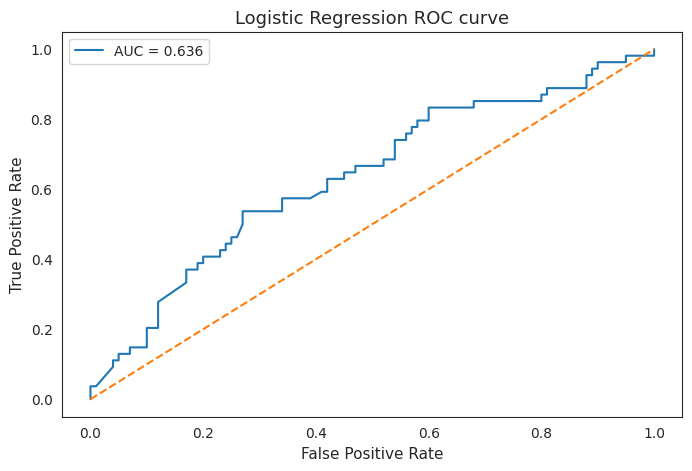

0.7037037037037037
0.5205479452054794
0.7037037037037037
0.5205479452054794
{'SVM__C': 960.9782860413562, 'SVM__gamma': 0.00945856422396747, 'SVM__kernel': 'rbf'}
0.33116883116883117


In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline
import scipy
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
svm_undersample = Pipeline(steps=[
                                     ('sample', RandomUnderSampler(random_state = 42)),
                                     ('SVM', SVC())])


svm_dist1 = {
    
    "SVM__C": scipy.stats.expon(scale=.1),
    "SVM__gamma": scipy.stats.expon(scale=.01),
    "SVM__kernel": ["rbf"],
}

svm_dist2 = {
    "SVM__C": scipy.stats.expon(scale=1),
    "SVM__gamma": scipy.stats.expon(scale=.01),
    "SVM__kernel": ["rbf"],
}

svm_dist3 = {
    "SVM__C": scipy.stats.expon(scale=10),
    "SVM__gamma": scipy.stats.expon(scale=.01),
    "SVM__kernel": ["rbf"],
}

svm_dist4 = {
    "SVM__C": scipy.stats.expon(scale=100),
    "SVM__gamma": scipy.stats.expon(scale=.01),
    "SVM__kernel": ["rbf"],
}

svm_dist5 = {
    "SVM__C": scipy.stats.expon(scale=1000),
    "SVM__gamma": scipy.stats.expon(scale=.01),
    "SVM__kernel": ["rbf"],
}

svm_dist6 = {
    "SVM__C": scipy.stats.expon(scale=.1),
    "SVM__gamma": scipy.stats.expon(scale=1),
    "SVM__kernel": ["rbf"],
}

svm_dist7 = {
    "SVM__C": scipy.stats.expon(scale=1),
    "SVM__gamma": scipy.stats.expon(scale=1),
    "SVM__kernel": ["rbf"],
}

svm_dist8 = {
    "SVM__C": scipy.stats.expon(scale=10),
    "SVM__gamma": scipy.stats.expon(scale=1),
    "SVM__kernel": ["rbf"],
}

svm_dist9 = {
    "SVM__C": scipy.stats.expon(scale=100),
    "SVM__gamma": scipy.stats.expon(scale=1),
    "SVM__kernel": ["rbf"],
}

svm_dist10 = {
    "SVM__C": scipy.stats.expon(scale=1000),
    "SVM__gamma": scipy.stats.expon(scale=1),
    "SVM__kernel": ["rbf"],
}

svm_dist11 = {
    "SVM__C": scipy.stats.expon(scale=.1),
    "SVM__gamma": scipy.stats.expon(scale=10),
    "SVM__kernel": ["rbf"],
}

svm_dist12 = {
    "SVM__C": scipy.stats.expon(scale=1),
    "SVM__gamma": scipy.stats.expon(scale=10),
    "SVM__kernel": ["rbf"],
}

svm_dist13 = {
    "SVM__C": scipy.stats.expon(scale=10),
    "SVM__gamma": scipy.stats.expon(scale=10),
    "SVM__kernel": ["rbf"],
}

svm_dist14 = {
    "SVM__C": scipy.stats.expon(scale=100),
    "SVM__gamma": scipy.stats.expon(scale=10),
    "SVM__kernel": ["rbf"],
}

svm_dist15 = {
    "SVM__C": scipy.stats.expon(scale=1000),
    "SVM__gamma": scipy.stats.expon(scale=10),
    "SVM__kernel": ["rbf"],
}

svm_dist16 = {
    "SVM__C": scipy.stats.expon(scale=10),
    "SVM__degree": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "SVM__kernel": ["poly"],
}

distributions = [svm_dist1, svm_dist2, svm_dist3, svm_dist4, svm_dist5,
                svm_dist6, svm_dist7, svm_dist8, svm_dist9, svm_dist10,
                svm_dist11, svm_dist12, svm_dist13, svm_dist14, svm_dist15,
                svm_dist16]

clf = RandomizedSearchCV(svm_undersample, distributions, random_state=42, scoring='f1_micro', cv=5)

y_pred, report = try_model(clf,
                           X_train,
                          Y_train ,
                           X_test,
                           Y_test)
y_predict_prob = lr.predict_proba(X_test)[:, 1]


print(report)
fpr, tpr, thresholds = roc_curve(Y_test, y_predict_prob)
auc = roc_auc_score(Y_test, y_predict_prob)
sns.set_style("white")
plt.figure(figsize = [8, 5])
plt.plot(fpr, tpr, label = (f"AUC = {auc:.3f}"))
plt.plot((0,1), ls = "--")
plt.title("Logistic Regression ROC curve", size = 13)
plt.xlabel("False Positive Rate", size = 11)
plt.ylabel("True Positive Rate", size = 11)
plt.legend(loc = 'best')
plt.show()
plt.show()
print(recall_(Y_test, y_pred))
print(precision(Y_test, y_pred))
print(recall_(Y_test, y_pred))
print(precision(Y_test, y_pred))
print(clf.best_params_)
from sklearn.metrics import mean_absolute_error

# Calculate the mean absolute error
mae = mean_absolute_error(Y_test, y_pred)
print(mae)

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
svm = SVC(C=0.05, gamma=0.477)

y_pred, report = try_model(
                        svm,
                        X_train,
                        Y_train,
                        X_test,
                        Y_test)
cm = confusion_matrix(Y_test, y_pred)
make_confusion_matrix(cm)

: 

0.6363636363636364
precision 0.4791666666666667
recall 0.42592592592592593
f1_score 0.4509803921568628
0.6334714136438274
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2}
0.42592592592592593
0.4791666666666667
0.42592592592592593
0.4791666666666667


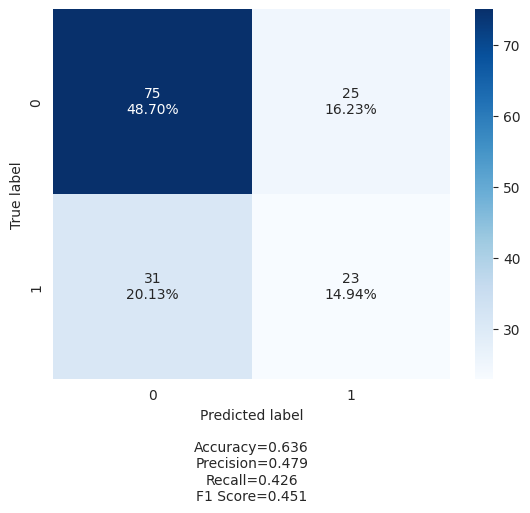

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
param_grid = {
            'max_depth':[1,None],
            'min_samples_leaf': randint(1, 9),
            'criterion':["gini", "entropy"]
            }
logreg_cv = RandomizedSearchCV(DecisionTreeClassifier() , param_grid, cv = 7)
y_pred, report = try_model(
                        logreg_cv,
                        X_train,
                        Y_train,
                        X_test,
                        Y_test)
cm = confusion_matrix(Y_test, y_pred)
make_confusion_matrix(cm)

print(logreg_cv.best_score_)
print(logreg_cv.best_params_)
print(recall_(Y_test, y_pred))
print(precision(Y_test, y_pred))
print(recall_(Y_test, y_pred))
print(precision(Y_test, y_pred))

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(8,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

model.fit(X_train, Y_train,batch_size=32,epochs=150)

2022-12-24 19:04:10.632410: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-24 19:04:12.637639: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-24 19:04:12.637726: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-24 19:04:12.777807: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-24 19:04:23.515073: W tensorflow/stream_executor/platform/de

Epoch 1/150
20/20 [==============================] - 1s 8ms/step - loss: 0.6960 - accuracy: 0.5261
Epoch 2/150
20/20 [==============================] - 0s 10ms/step - loss: 0.6565 - accuracy: 0.6482
Epoch 3/150
20/20 [==============================] - 0s 8ms/step - loss: 0.6386 - accuracy: 0.6515
Epoch 4/150
20/20 [==============================] - 0s 8ms/step - loss: 0.6265 - accuracy: 0.6629
Epoch 5/150
20/20 [==============================] - 0s 8ms/step - loss: 0.6214 - accuracy: 0.6938
Epoch 6/150
20/20 [==============================] - 0s 4ms/step - loss: 0.6155 - accuracy: 0.6824
Epoch 7/150
20/20 [==============================] - 0s 5ms/step - loss: 0.6101 - accuracy: 0.6808
Epoch 8/150
20/20 [==============================] - 0s 5ms/step - loss: 0.6054 - accuracy: 0.6971
Epoch 9/150
20/20 [==============================] - 0s 5ms/step - loss: 0.6033 - accuracy: 0.6873
Epoch 10/150
20/20 [==============================] - 0s 5ms/step - loss: 0.5986 - accuracy: 0.6775
Epoch 11

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
y_pred  = [1 if y>=0.5 else 0 for y in y_pred] 

print(f"precision {precision_score(Y_test, y_pred)}")
print(f"recall {recall_score(Y_test, y_pred)}")
print(f"f1_score {f1_score(Y_test, y_pred)}")
print(classification_report(Y_test,y_pred))



5/5 [==============================] - 0s 2ms/step
precision 0.5714285714285714
recall 0.37037037037037035
f1_score 0.449438202247191
              precision    recall  f1-score   support

         0.0       0.71      0.85      0.78       100
         1.0       0.57      0.37      0.45        54

    accuracy                           0.68       154
   macro avg       0.64      0.61      0.61       154
weighted avg       0.66      0.68      0.66       154



In [ ]:
# model evaluation
# accuracy score on the training data
X_train_prediction=classifer.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy score of the training data :',training_data_accuracy)

: 

0.6753246753246753
precision 0.5333333333333333
recall 0.5925925925925926
f1_score 0.5614035087719299
0.3246753246753247


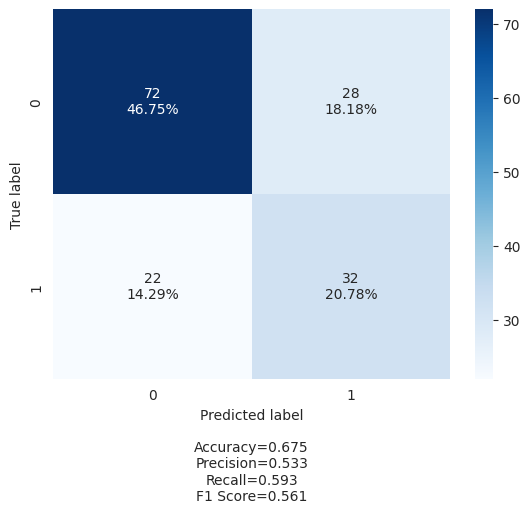

In [ ]:

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('gs', grid_search),('dt', logreg_cv),  ('svc', clf)], voting='hard'

) 
voting_clf.fit(X_train, Y_train)
y_pred = voting_clf.predict(X_test)
classification_report(Y_test, y_pred)
y_pred, report = try_model(
                        voting_clf,
                        X_train,
                        Y_train,
                        X_test,
                        Y_test)
cm = confusion_matrix(Y_test, y_pred)
make_confusion_matrix(cm)
from sklearn.metrics import mean_absolute_error

# Calculate the mean absolute error
mae = mean_absolute_error(Y_test, y_pred)
print(mae)
 

In [ ]:
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74       100
         1.0       0.53      0.59      0.56        54

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.68      0.68      0.68       154



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier


# Create a BaggingClassifier that trains an ensemble of KNN classifiers
bagging_clf = BaggingClassifier(KNeighborsClassifier(n_neighbors= 7, p= 2, weights='uniform'), n_estimators=10, max_samples=0.8, bootstrap=True, n_jobs=-1)

# Fit the BaggingClassifier to the training data
bagging_clf.fit(X_train, Y_train)

# Use the BaggingClassifier to make predictions on the test data
y_pred = bagging_clf.predict(X_test)
print(recall_(Y_test, y_pred))

0.42592592592592593


/home/ammat/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=7.
  warnings.warn(
/home/ammat/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=7.
  warnings.warn(
/home/ammat/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=7.
  warnings.warn(
/home/ammat/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=7.
  warnings.warn(
/home/ammat/ML/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=7.
  warnings.warn(
/home/ammat/ML/lib/python3.8/s

precision 0.5294117647058824
recall 0.16666666666666666
f1_score 0.2535211267605634


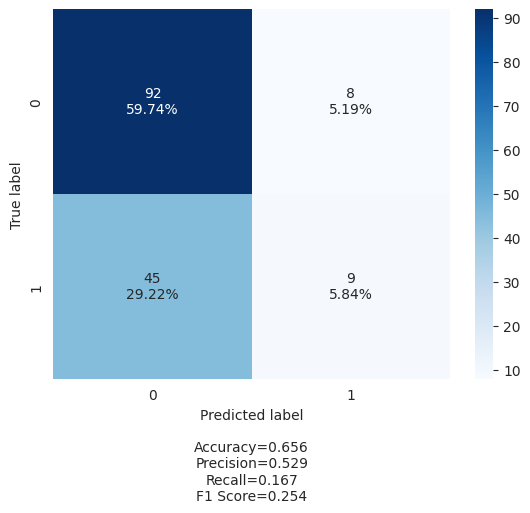

In [ ]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(logreg_cv, n_estimators=100,  max_samples=50, bootstrap=True, n_jobs=-1)
bg.fit(X_train, Y_train)
y_pred = bg.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
make_confusion_matrix(cm)
print(f"precision {precision_score(Y_test, y_pred)}")
print(f"recall {recall_score(Y_test, y_pred)}")
print(f"f1_score {f1_score(Y_test, y_pred)}")

In [ ]:
bg = BaggingClassifier(logreg_cv,  bootstrap=True, n_jobs=-1)
bg.fit(X_train, Y_train)
y_pred = bg.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
make_confusion_matrix(cm)
print(f"precision {precision_score(Y_test, y_pred)}")
print(f"recall {recall_score(Y_test, y_pred)}")
print(f"f1_score {f1_score(Y_test, y_pred)}")

: 

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=120, tol=1, random_state=42)
sgd_clf.fit(X_train, Y_train)
y_pred = bg.predict(X_test)
print(f"precision {precision_score(Y_test, y_pred)}")
print(f"recall {recall_(Y_test, y_pred)}")
print(f"f1_score {f1_score(Y_test, y_pred)}")


precision 0.5294117647058824
recall 0.16666666666666666
f1_score 0.2535211267605634


In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train, cv=3)

: 

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(Y_train, y_train_pred)

: 

In [ ]:
recall_score(Y_train, y_train_pred)

: 

In [ ]:
from sklearn.metrics import f1_score

f1_score(Y_train, y_train_pred)

: 

In [ ]:
#making predictive system 
# n form csv 
input_data=(5,166,72,19,175,25.8,0.587,51)
# chaning the input data to numpyarray
input_data_as_numpy_array=np.asarray(input_data)
# reshape the array 
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
#standaraize the input data
std_data=scaler.transform(input_data_reshape)
print(std_data)

: 

In [ ]:
prediction=classifer.predict(std_data)
print(prediction)

: 

In [ ]:
if(prediction[0]==0):
    print('The person is is not disbetes')
else:
    print('The person is disbetes')

: 

In [ ]:
# save the train model 
import pickle
filename='diabetes_model.sav'
pickle.dump(classifer,open(filename,'wb'))
# loading the save model 
load_model=pickle.load(open('diabetes_model.sav','rb'))

: 